# Этап 4

Этот этап включает в себя создание Docker-образа для вашего проекта и изменение манифеста MLflow Project для запуска вашего эксперимента в изолированном Docker-контейнере. Вот шаги, которые вам нужно выполнить:

## 1. Создание Dockerfile и файла requirements.txt

В **корневой директории** вашего проекта создайте файл Dockerfile и requirements.txt с следующим содержимым:

In [3]:
# В каталоге вашего проекта создайте файл с именем MLproject (без расширения файла).

import os

# Создание файлов внутри директорий
open("Dockerfile", "w").close()
open("requirements.txt", "w").close()

In [4]:
import os

In [5]:
Docker_ML_content = """
# Используйте официальный образ Python
FROM python:3.10-slim-buster

# Установите рабочую директорию в /app
WORKDIR /app

# Копируйте текущий каталог в /app
COPY . /app

# Установите все необходимые пакеты из файла requirements.txt
COPY requirements.txt /tmp
RUN pip install -r /tmp/requirements.txt

# Запустите train.py при запуске контейнера
CMD ["python", "train.py"]
"""
with open("Dockerfile", "w") as file:
    file.write(Docker_ML_content)

In [6]:
requirements_ML_content = """
cryptography==41.0.3
boto3==1.28.39
mlflow==2.6.0
pymysql==1.1.0
scikit-learn==1.0.2
pandas==1.4.4
hyperopt==0.2.7
"""

with open("requirements.txt", "w") as file:
    file.write(requirements_ML_content)


## 2. Сборка Docker-образа

In [3]:
!docker build -f Dockerfile -t kinopoisk:1.0.0 .

[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                                          docker:default
[+] Building 0.0s (0/0)                 

## 3. Изменение манифеста MLflow Project

In [4]:
MLproject_content = """
name: kinopoisk_project

docker_env:
  image: kinopoisk:1.0.0

entry_points:
  main:
    parameters:
      data_file: {type: str, default: "datasets/kinopoisk_train.csv"}
    command: "python train.py"
"""
with open("MLproject", "w") as file:
    file.write(MLproject_content)

## 4. Запуск эксперимента с помощью MLflow

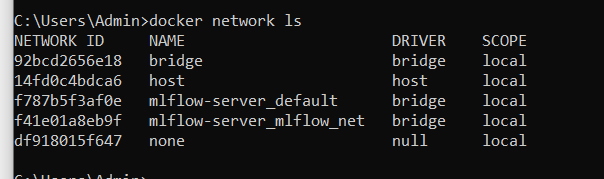


In [5]:
import os

# Установка переменных окружения в Unix-подобных системах (Mac, Linux)
os.system('export MLFLOW_TRACKING_URI=http://localhost:5000')
os.system('export MLFLOW_S3_ENDPOINT_URL=http://localhost:9000')

# Установка переменных окружения в Windows
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:5000'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000'
os.environ['AWS_ACCESS_KEY_ID'] = 'minio'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'minio123'

!mlflow run . --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

2023/10/13 00:37:58 INFO mlflow.projects.docker: === Building docker image kinopoisk_project:1494f8f ===
2023/10/13 00:38:00 INFO mlflow.projects.utils: === Created directory /tmp/tmpk94166o8 for downloading remote URIs passed to arguments of type 'path' ===
2023/10/13 00:38:00 INFO mlflow.projects.backend.local: === Running command 'docker run --rm --network mlflow-server_mlflow_net -v /root/.aws:/.aws -e MLFLOW_RUN_ID=5e5ca9721ca94113aace3db8df58760e -e MLFLOW_TRACKING_URI=http://localhost:5000 -e MLFLOW_EXPERIMENT_ID=1 -e AWS_SECRET_ACCESS_KEY=minio123 -e AWS_ACCESS_KEY_ID=minio -e MLFLOW_S3_ENDPOINT_URL=http://localhost:9000 kinopoisk_project:1494f8f python train.py' in run with ID '5e5ca9721ca94113aace3db8df58760e' === 
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

## 5. Запуск эксперимента прямо из репозитория

In [6]:
import os

# Установка переменных окружения в Unix-подобных системах (Mac, Linux)
os.system('export MLFLOW_TRACKING_URI=http://localhost:5000')
os.system('export MLFLOW_S3_ENDPOINT_URL=http://localhost:9000')

# Установка переменных окружения в Windows
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:5000'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000'
os.environ['AWS_ACCESS_KEY_ID'] = 'minio'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'minio123'

!mlflow run https://github.com/ilapro53/skillbox_mlflow_train2_from_git.git --experiment-name=kinopoisk --docker-args network=mlflow-server_mlflow_net --build-image

2023/10/13 00:39:27 INFO mlflow.projects.utils: === Fetching project from https://github.com/ilapro53/skillbox_mlflow_train2_from_git.git into /tmp/tmpynnw5ubr ===
2023/10/13 00:39:30 INFO mlflow.projects.utils: Fetched 'main' branch
2023/10/13 00:39:32 INFO mlflow.projects.docker: === Building docker image kinopoisk_project:1494f8f ===
2023/10/13 00:39:37 INFO mlflow.projects.utils: === Created directory /tmp/tmp_6n04gy9 for downloading remote URIs passed to arguments of type 'path' ===
2023/10/13 00:39:37 INFO mlflow.projects.backend.local: === Running command 'docker run --rm --network mlflow-server_mlflow_net -v /root/.aws:/.aws -e MLFLOW_RUN_ID=caf9ed3a8d764a4da345467b6aa1b600 -e MLFLOW_TRACKING_URI=http://localhost:5000 -e MLFLOW_EXPERIMENT_ID=1 -e AWS_SECRET_ACCESS_KEY=minio123 -e AWS_ACCESS_KEY_ID=minio -e MLFLOW_S3_ENDPOINT_URL=http://localhost:9000 kinopoisk_project:1494f8f python train.py' in run with ID 'caf9ed3a8d764a4da345467b6aa1b600' === 
/usr/local/lib/python3.10/site-

Теперь ваш эксперимент будет запускаться в изолированном Docker-контейнере с фиксированным окружением, и код для эксперимента будет извлекаться из вашего удаленного Git-репозитория, что обеспечивает повторяемость и воспроизводимость экспериментов.